In [1]:
import pandas as pd

In [4]:
df_train = pd.read_csv("./data/train.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348470 entries, 0 to 1348469
Data columns (total 17 columns):
patient_id    1348470 non-null int64
key           1348470 non-null object
gender        1348470 non-null int64
age           1348470 non-null int64
x1            1348470 non-null int64
x2            1348470 non-null int64
x3            1348470 non-null int64
x4            1348470 non-null int64
x5            1348470 non-null int64
x6            1348470 non-null int64
xx1           1348470 non-null float64
xx2           1348470 non-null float64
xx3           1348470 non-null float64
xx4           1348470 non-null float64
xx5           1348470 non-null float64
y_mean_MAP    1348470 non-null float64
y_mean_HR     1348470 non-null float64
dtypes: float64(7), int64(9), object(1)
memory usage: 174.9+ MB


In [6]:
df_train.head()

,patient_id,key,gender,age,x1,x2,x3,x4,x5,x6,xx1,xx2,xx3,xx4,xx5,y_mean_MAP,y_mean_HR
0,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,99.9,49.4,62.5,59.04,80.0
1,1891,1891-3,1,75,22,1,2,0,0,1,80.0,94.9,98.4,48.7,61.3,59.04,80.0
2,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,95.3,48.5,60.3,59.04,80.0
3,1891,1891-3,1,75,22,1,2,0,0,1,80.0,95.0,97.4,48.9,61.3,59.04,80.0
4,1891,1891-3,1,75,22,1,2,0,0,1,76.7,95.7,99.6,50.2,62.8,59.04,80.0


### Missing data percentage

In [12]:
def percent_missing(df, column_name):
    perc_na = sum(df[column_name].isna()) / len(df[column_name])
    return perc_na

In [13]:
for column_name in df_train.columns:
    print(column_name, percent_missing(df_train, column_name))

patient_id 0.0
key 0.0
gender 0.0
age 0.0
x1 0.0
x2 0.0
x3 0.0
x4 0.0
x5 0.0
x6 0.0
xx1 0.0
xx2 0.0
xx3 0.0
xx4 0.0
xx5 0.0
y_mean_MAP 0.0
y_mean_HR 0.0


In [14]:
for i in df_train.columns:
    print(str(i))
    print(df_train[i].nunique())

patient_id
2321
key
44949
gender
2
age
74
x1
79
x2
21
x3
5
x4
2
x5
2
x6
2
xx1
18636
xx2
5649
xx3
36414
xx4
18743
xx5
34802
y_mean_MAP
24555
y_mean_HR
24936


### Target Exploration

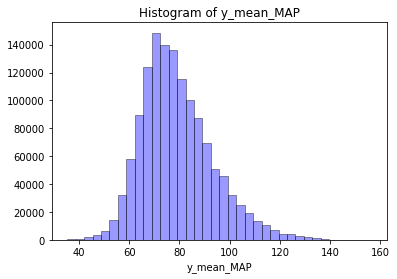

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(df_train['y_mean_MAP'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of y_mean_MAP')
# plt.xlabel('Delay (min)')
# plt.ylabel('Flights')
plt.show()

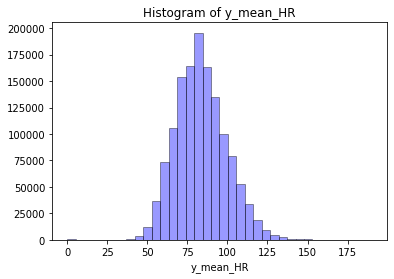

In [25]:
# seaborn histogram
sns.distplot(df_train['y_mean_HR'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of y_mean_HR')
# plt.xlabel('Delay (min)')
# plt.ylabel('Flights')
plt.show()

### Feature Exploration


In [52]:
df_features = df_train.select_dtypes(include = ['float64','int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a553ef358>,
      dtype=object)

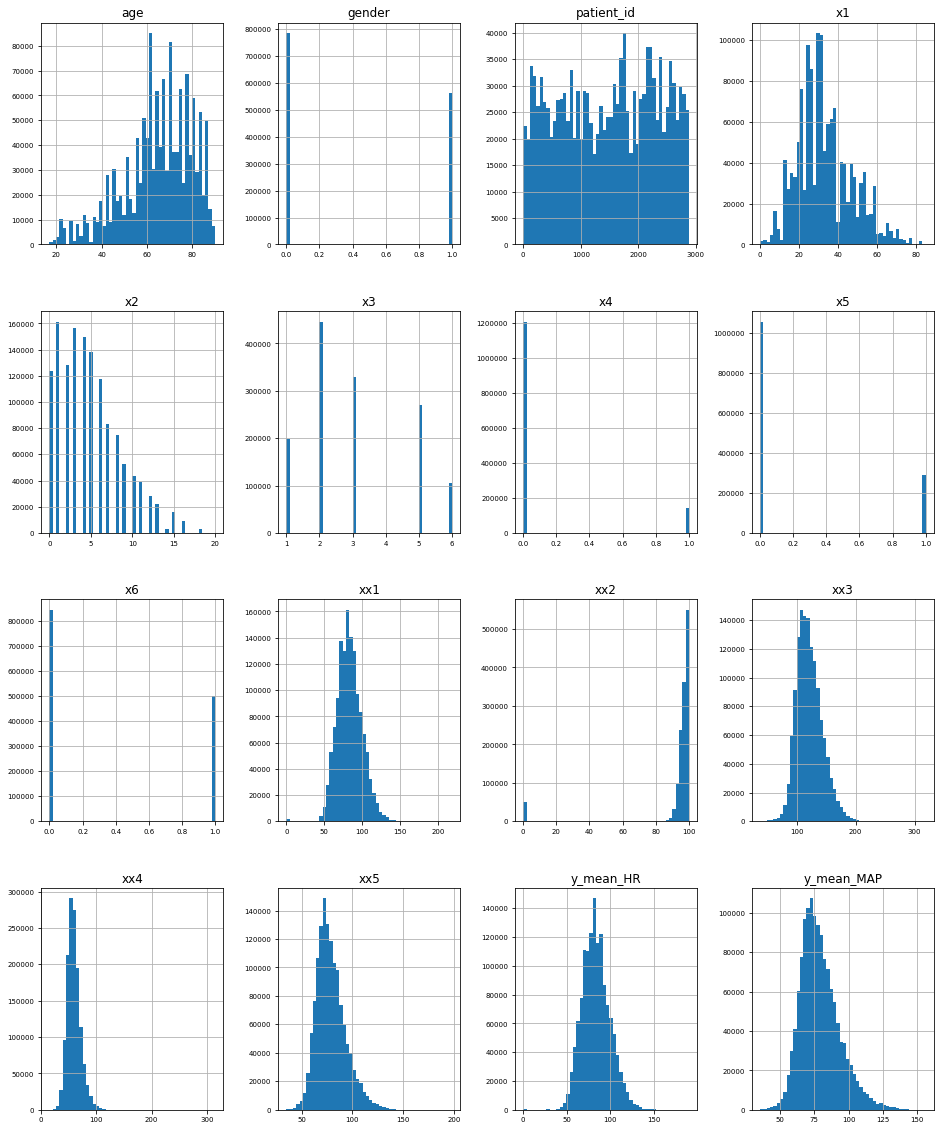

In [49]:
df_features.hist(figsize=(16,20), bins = 50, xlabelsize = 7, ylabelsize = 7)

### Correlations

#### Taregt to Features Correlation

In [60]:
df_features_corr = df_features.corr()['y_mean_HR'][:-2]
corr_list = df_features_corr[abs(df_features_corr)>0.5].sort_values(ascending = False)
print("There are {} strongly correlated with y_mean_HR:\n{}".format(len(corr_list), corr_list))

There are 1 strongly correlated with y_mean_HR:
xx1    0.92346
Name: y_mean_HR, dtype: float64


In [61]:
df_features_corr = df_features.corr()['y_mean_MAP'][:-2]
corr_list = df_features_corr[abs(df_features_corr)>0.5].sort_values(ascending = False)
print("There are {} strongly correlated with y_mean_MAP:\n{}".format(len(corr_list), corr_list))

There are 3 strongly correlated with y_mean_MAP:
xx5    0.853112
xx4    0.767351
xx3    0.683348
Name: y_mean_MAP, dtype: float64


#### Feature to Features Correlation

In [65]:
corr = df_train.drop(['y_mean_MAP','y_mean_HR'], axis = 1).corr()

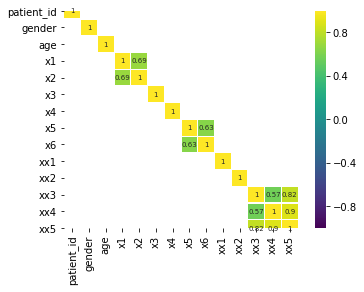

In [67]:
sns.heatmap(corr[(corr >= 0.5) | (corr<= -0.4)], cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1, annot = True, annot_kws = {'size': 7}, square = True)